In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('heights1.csv')
df

,Name,Height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [7]:
df.describe()

,Height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [11]:
q1=df.Height.quantile(0.25)
q1

5.25

In [13]:
q3=df.Height.quantile(0.75)
q3

6.175

In [14]:
iqr=q3-q1
iqr

0.9249999999999998

In [16]:
lower_l=q1-1.5*(iqr)
lower_l

3.8625000000000003

In [17]:
upper_l=q3+1.5*iqr
upper_l

7.5625

In [18]:
outliers=df[(df.Height<lower_l) | (df.Height>upper_l)]

,Name,Height
9,imran,14.5
12,yoseph,1.2


In [19]:
no_outliers=df[(df.Height>lower_l) & (df.Height<upper_l)]
no_outliers

,Name,Height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [21]:
no_outliers.Height.describe()

count    12.000000
mean      5.750000
std       0.636039
min       4.900000
25%       5.350000
50%       5.550000
75%       6.125000
max       7.100000
Name: Height, dtype: float64

### Exercise
You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here, https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [23]:
import pandas as pd

df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
df.shape

(10000, 3)

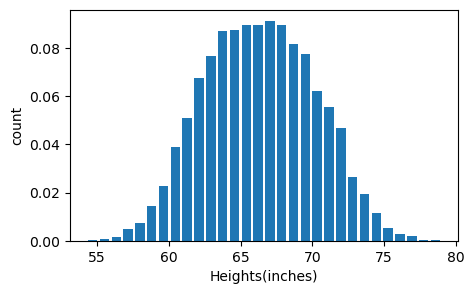

In [33]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(5,3)



plt.hist(df.Height,bins=30,rwidth=0.8,density=True)
plt.xlabel('Heights(inches)')
plt.ylabel('count')
plt.show()

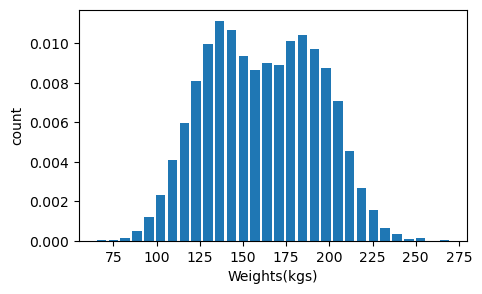

In [35]:
plt.hist(df.Weight,bins=30,rwidth=0.8,density=True)
plt.xlabel('Weights(kgs)')
plt.ylabel('count')
plt.show()

In [36]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [51]:
Q1=df.Weight.quantile(0.25)
Q1

135.8180513055015

In [52]:
Q3=df.Weight.quantile(0.75)
Q3

187.16952486868348

In [53]:
IQR=Q3-Q1
IQR

51.35147356318197

In [54]:
lower=Q1-1.5*IQR
lower

58.79084096072856

In [55]:
upper=Q3+1.5*IQR
upper

264.19673521345646

In [57]:
weight_outliers=df[(df.Weight<lower)|(df.Weight>upper)]
weight_outliers

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [58]:
weight_no_outliers=df[(df.Weight>lower)&(df.Weight<upper)]
weight_no_outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [59]:
weight_no_outliers.Weight.describe()

count    9999.000000
mean      161.429501
std        32.091686
min        64.700127
25%       135.817009
50%       161.201891
75%       187.152394
max       255.863326
Name: Weight, dtype: float64

## detect heights outliers

In [60]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [61]:
q1=df.Height.quantile(0.25)
q3=df.Height.quantile(0.75)
q1,q3

(63.505620481218955, 69.1742617268347)

In [62]:
iqr=q3-q1
iqr

5.668641245615746

In [63]:
low=q1-1.5*iqr
upp=q3+1.5*iqr
low,upp

(55.00265861279534, 77.67722359525831)

In [64]:
height_outliers=df[(df.Height<low)|(df.Height>upp)]
height_outliers

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [65]:
height_no_outliers=df[(df.Height>low)&(df.Height<upp)]
height_no_outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [66]:
height_outliers.Height.describe()


count     8.000000
mean     69.557496
std      12.402263
min      54.263133
25%      54.809510
50%      78.278960
75%      78.551501
max      78.998742
Name: Height, dtype: float64